In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download = True,
                                   transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor())

## Iterate and Visualizing dataset

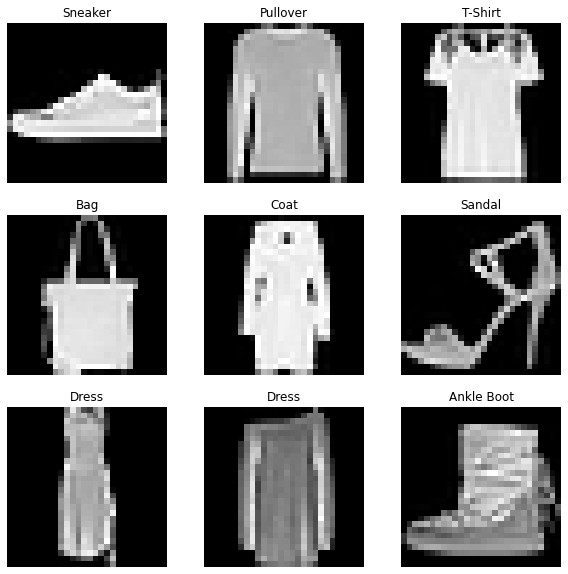

In [4]:
labels_mapping = {0: "T-Shirt",
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Coat",
                  5: "Sandal",
                  6: "Shirt", 
                  7: "Sneaker",
                  8: "Bag",
                  9: "Ankle Boot",}

figure_1 = plt.figure(figsize = (10, 10))
cols, rows  = 3, 3

for i in range(1, cols * rows + 1): 
  sample_idx = torch.randint(len(train_data), size = (1,)).item()
  img, label = train_data[sample_idx]
  figure_1.add_subplot(rows, cols, i)
  plt.title(labels_mapping[label])

  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

## Custom Dataset

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

In [6]:
class CustomImageDataset(Dataset): 
  def __init__(self, annotations_file, image_dir, transform = None, target_transform = None): 
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = image_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self): 
    return len(self.img_labels)

  def __getitem__(self, idx): 
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]

    if self.transform: 
      image = self.transform(image)

    if self.target_tranform:
      label = self.target_transform(label)

    return image, label

### Preparing the data for training with DataLoaders

In [7]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_data_loader = DataLoader(test_data, batch_size = 64, shuffle = True)


### Iterate through DataLoader

Feature Batch Shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


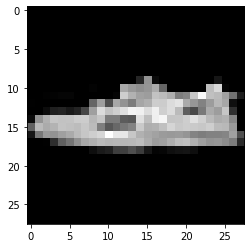

Label: 5


In [9]:
train_features, train_labels = next(iter(train_data_loader))
print(f"Feature Batch Shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.show()

print(f"Label: {label}")